In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from transformers import pipeline

In [28]:
X_train = pd.read_csv("drugsComTrain_raw.tsv", sep= '\t', usecols = ["review"])
y_train = pd.read_csv("drugsComTrain_raw.tsv", sep= '\t', usecols = ["rating"])

X_test = pd.read_csv("drugsComTest_raw.tsv", sep= '\t', usecols = ["review"])
y_test = pd.read_csv("drugsComTest_raw.tsv", sep= '\t', usecols = ["rating"])

In [36]:
clf_sentiment = pipeline("sentiment-analysis", padding=True, truncation=True)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)
Some layers from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english were not used when initializing TFDistilBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english and are 

In [57]:
X_test_sample = X_test['review'][:1001]
y_test_sample = y_test['rating'][:1001]

sentiment = []
for sentence in tqdm(X_test_sample):
    sentiment.append(clf_sentiment(sentence)[0]["label"])

100%|██████████| 1001/1001 [05:11<00:00,  3.22it/s]


In [58]:
eval_data = pd.DataFrame()
eval_data['ratings'] = y_test_sample
eval_data['sentiment'] = sentiment

Text(0.5, 1.0, 'distribution of ratings in positive sentiment')

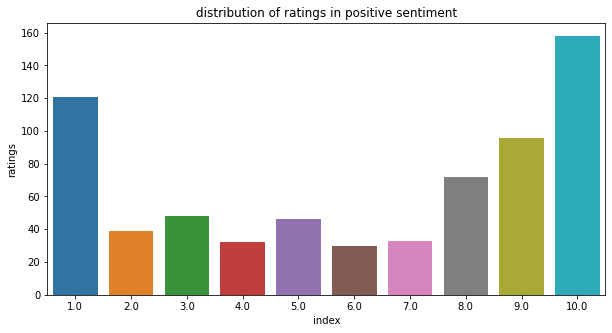

In [71]:
negative = eval_data[eval_data['sentiment']=='NEGATIVE']
ratings_neg_sentiment = negative['ratings'].value_counts().sort_index().reset_index()
plt.figure(figsize = (10,5))
sns.barplot(data = ratings_neg_sentiment, x='index', y='ratings')
plt.title('distribution of ratings in negativ sentiment')
plt.show()


Text(0.5, 1.0, 'distribution of ratings in positive sentiment')

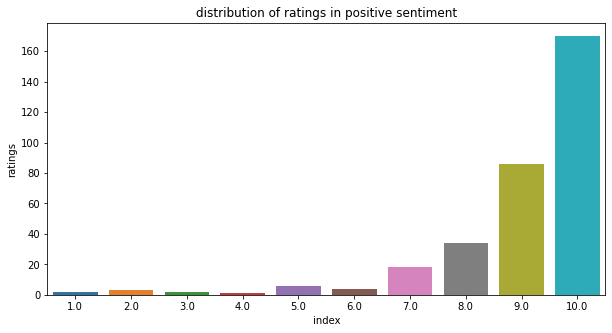

In [73]:
positive = eval_data[eval_data['sentiment']=='POSITIVE']
positive_sentiment = positive['ratings'].value_counts().sort_index().reset_index()
plt.figure(figsize = (10,5))
sns.barplot(data = positive_sentiment, x='index', y='ratings')
plt.title('distribution of ratings in positive sentiment')
plt.show()